In [19]:
# Importing the packages
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
sd = pd.read_csv(r"C:\Users\bless\OneDrive\Desktop\Data Science\Python\Case Studies\Python Foundation Case Study 4 - Python Visualization Case Study\Case Study 4 - Python Visualizations Case Study\SalesData.csv")

In [21]:
sd.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


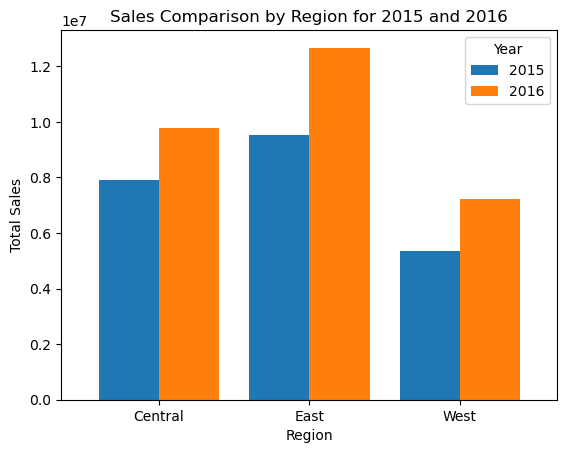

In [22]:
# 1. Compare Sales by region for 2016 with 2015 using bar chart

# Group by Region and calculate total sales for 2015 and 2016
sales_by_region = sd.groupby('Region')[['Sales2015', 'Sales2016']].sum()

# Plot the data
sales_by_region.plot(kind='bar', width=0.8)
plt.title('Sales Comparison by Region for 2015 and 2016')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Year', labels=['2015', '2016'])

plt.show()

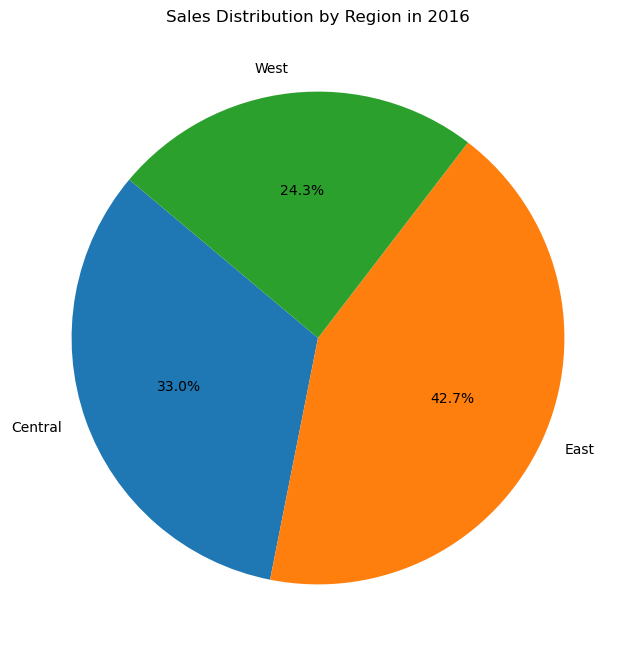

In [23]:
# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

#  Group the data by Region and calculate the total sales for each region in 2016

sales_by_region_2016 = sd.groupby('Region')['Sales2016'].sum()

# Create a pie chart to visualize the sales distribution by region in 2016
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region_2016, labels=sales_by_region_2016.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region in 2016')

plt.show()

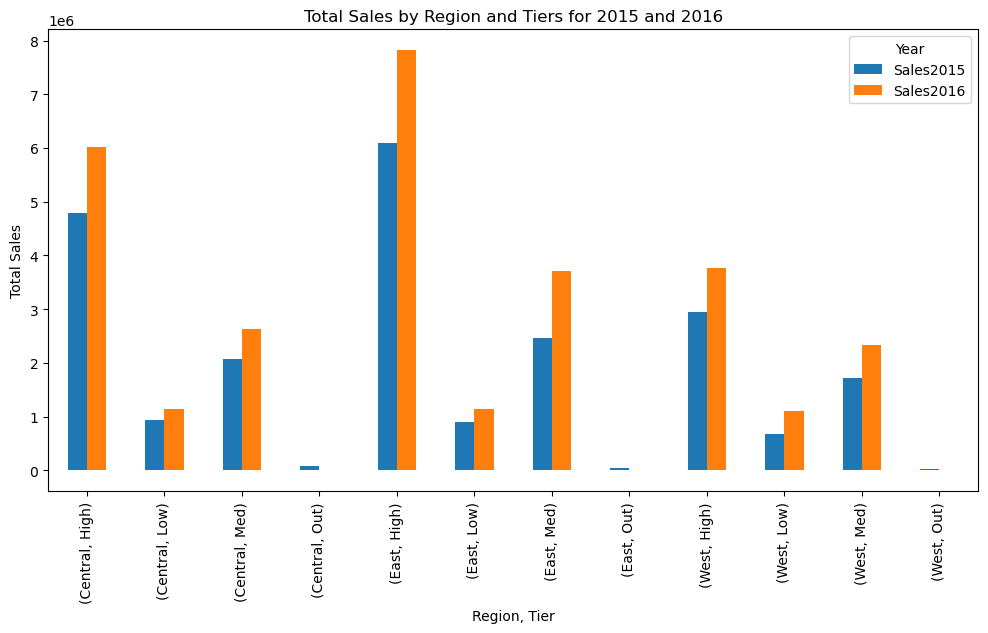

In [24]:
# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

# Create a pivot table to compare total sales for 2015 and 2016 by Region and Tiers
pivot_table = pd.pivot_table(sd, values=['Sales2015', 'Sales2016'], index=['Region', 'Tier'], aggfunc='sum')

# Plot the pivot table data
pivot_table.plot(kind='bar', figsize=(12, 6))

plt.title("Total Sales by Region and Tiers for 2015 and 2016")
plt.xlabel("Region, Tier")
plt.ylabel("Total Sales")
plt.legend(title="Year")

plt.show()


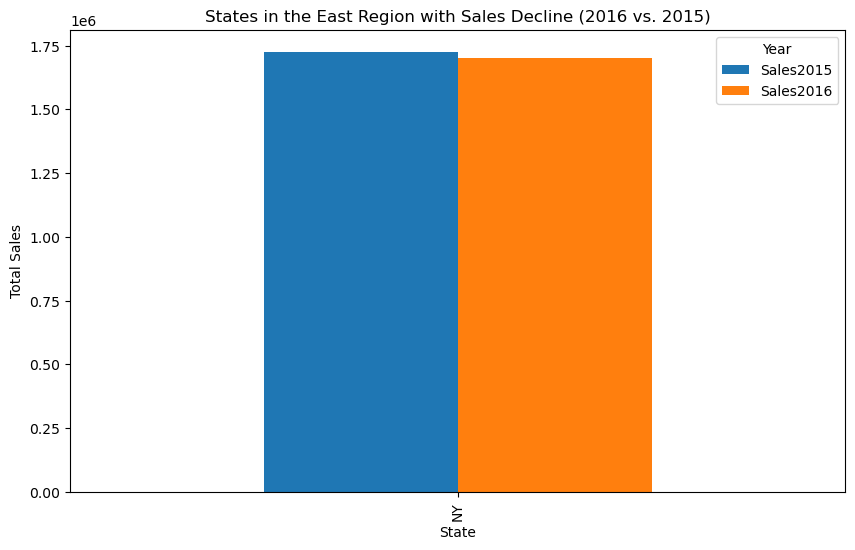

In [25]:
# 4. In East region, which state registered a decline in 2016 as compared to 2015?

# Filter the data for the East region
east_data = sd[sd['Region'] == 'East']

# Create a pivot table to compare sales by state for 2015 and 2016
pivot_table = pd.pivot_table(east_data, values=['Sales2015', 'Sales2016'], index='State', aggfunc='sum')

# Calculate the states with a decline in sales in 2016 compared to 2015
decline_states = pivot_table[pivot_table['Sales2016'] < pivot_table['Sales2015']]

# Plot the states with a sales decline
decline_states.plot(kind='bar', figsize=(10, 6))

plt.title("States in the East Region with Sales Decline (2016 vs. 2015)")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.legend(title="Year")

plt.show()

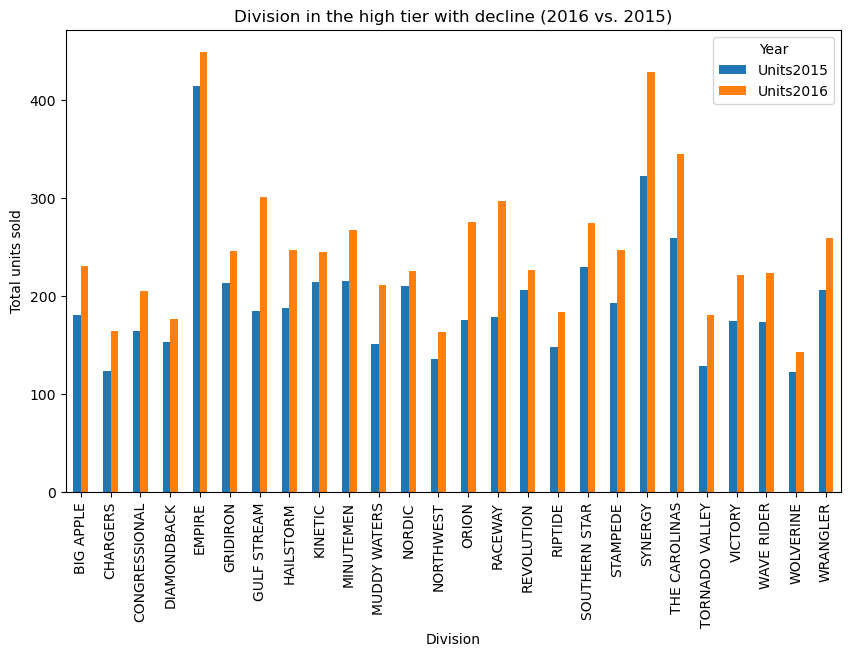

In [26]:
# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

# Filter the data for the East region
high_data = sd[sd['Tier'] == 'High']

# Create a pivot table to compare sales by state for 2015 and 2016
pivot_table = pd.pivot_table(high_data, values=['Units2015', 'Units2016'], index='Division', aggfunc='sum')

# Calculate the states with a decline in sales in 2016 compared to 2015
decline_states = pivot_table[pivot_table['Units2015'] < pivot_table['Units2016']]

# Plot the states with a sales decline
decline_states.plot(kind='bar', figsize=(10, 6))

plt.title("Division in the high tier with decline (2016 vs. 2015)")
plt.xlabel("Division")
plt.ylabel("Total units sold")
plt.legend(title="Year")

plt.show()

In [34]:
# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset.

import pandas as pd


df = pd.DataFrame(sd)

# Define a dictionary to map months to quarters
month_to_quarter = {
    'Jan': 'Q1',
    'Feb': 'Q1',
    'Mar': 'Q1',
    'Apr': 'Q2',
    'May': 'Q2',
    'Jun': 'Q2',
    'Jul': 'Q3',
    'Aug': 'Q3',
    'Sep': 'Q3',
    'Oct': 'Q4',
    'Nov': 'Q4',
    'Dec': 'Q4'
}

# Create the "Quarters" column using the map function
df['Qtr'] = df['Month'].map(month_to_quarter)

print(df)

      AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units

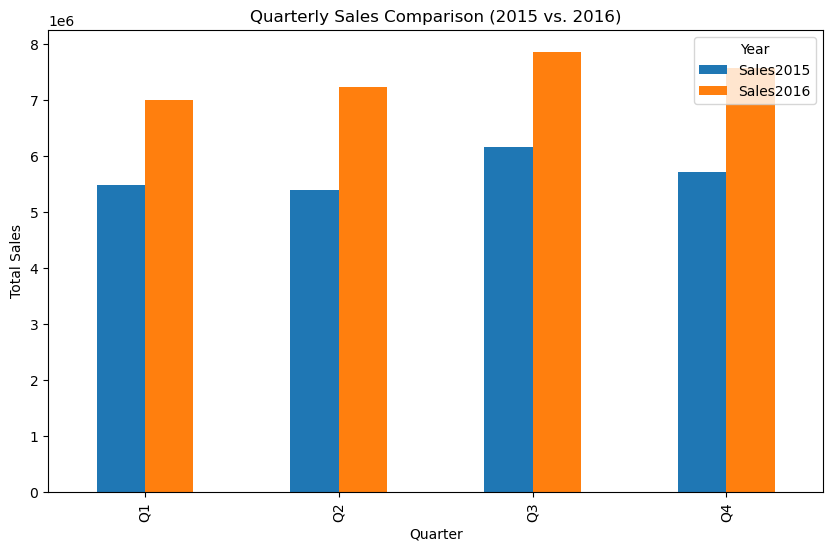

In [36]:
# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

# Create a pivot table to compare quarterly sales for 2015 and 2016
pivot_table = pd.pivot_table(sd, values=['Sales2015', 'Sales2016'], index='Qtr', aggfunc='sum')

# Plot the pivot table data
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.title("Quarterly Sales Comparison (2015 vs. 2016)")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.legend(title="Year")

plt.show()


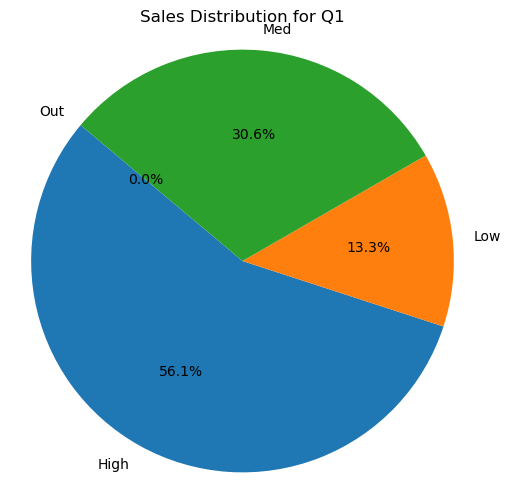

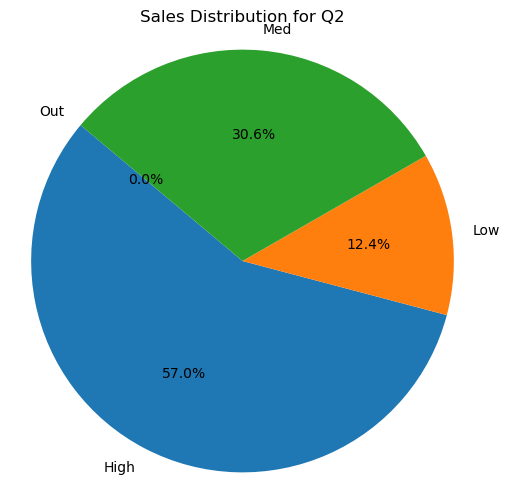

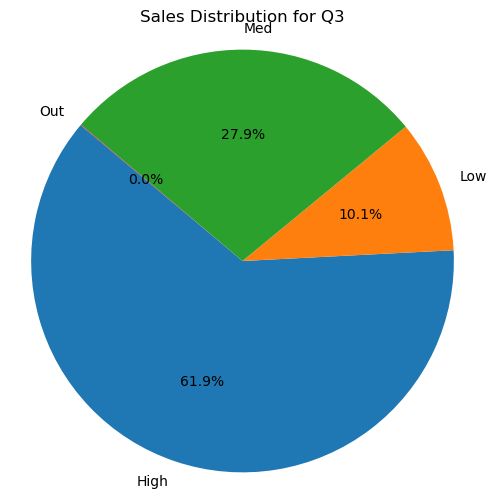

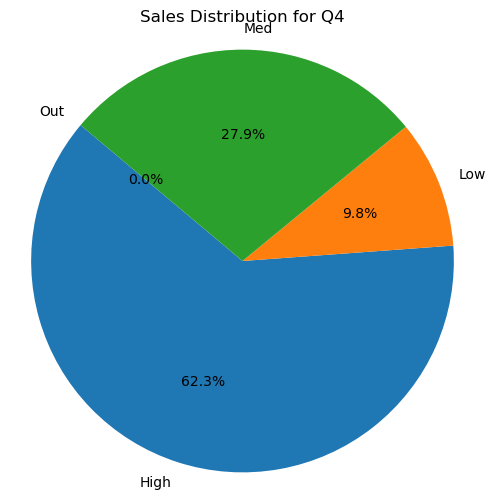

In [41]:
# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
# (Draw 4 pie charts representing a Quarter for each Tier)

# Take the absolute values of Sales2016 for visualization
df['Sales2016'] = df['Sales2016'].abs()

# Group the data by Quarter and Tier and calculate total sales
grouped = df.groupby(['Qtr', 'Tier'])['Sales2016'].sum().unstack()

# Create a pie chart for each quarter and each tier
quarters = grouped.index

for quarter in quarters:
    plt.figure(figsize=(6, 6))
    plt.pie(grouped.loc[quarter], labels=grouped.columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sales Distribution for {quarter}')
    plt.axis('equal') 

    plt.show()

In [35]:
sd.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarters,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3,Q3
